## Практика - реализуйте сами (без использования SKLEARN) наивный баесовский классификатор для этой задачи

#### - Постройте наивный баессовский классификатор для датасета MNIST (так же есть в торче). Классификатор строить только для двух цифр (1 и 2).
#### - Оцените качество полученного классификатора на тестовой выборке
#### -  Выведите 10 ошибок предсказа

In [1]:
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import math

In [2]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [3]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [87]:
our_target=[1,2]
data = [mnist_train[i] for i in range(len(mnist_train))]
X_train = torch.stack([d[0] for d in data if d[1] in our_target], dim=0)
y_train =torch.tensor([d[1] for d in data if d[1] in our_target])
data = [mnist_train[i] for i in range(len(mnist_test))]
X_test = torch.stack([d[0] for d in data if d[1] in our_target], dim=0)
y_test=torch.tensor([d[1] for d in data if d[1] in our_target])

### 1) Постройте наивный баессовский классификатор для датасета MNIST (так же есть в торче). Классификатор строить только для двух цифр (1 и 2)

In [84]:
class naive_baice:
    def __init__(self):
        self.probs={}
    def fit(self, X,y):
        for i in y.unique():
                self.probs[i] = {
                    'p' :X[y==i].sum(axis=0).float()/y[y==i].shape[0] ,
                    'p_aprior':y[y==i].shape[0]/X.shape[0],
                    }        
    def predict(self,X):
        predict_prob = torch.zeros( X.shape[0], (len(self.probs.keys())), dtype=torch.float64)
        for im in  range(X.shape[0]):
            image=X[im]
            for i,label in enumerate(self.probs.keys()):

                predict_prob[im,i]=(torch.log(torch.tensor(self.probs[label]['p_aprior']))+ \
                            torch.log(image*self.probs[label]['p']+10**(-7))).sum()
        predictions=torch.gather(torch.tensor(list(self.probs.keys())),0, torch.argmax(predict_prob, dim=1))        
        return predictions

In [88]:
clf=naive_baice()
clf.fit(X_train,y_train)
pred=clf.predict(X_train)
(pred==y_train).sum().numpy()/X_train.shape[0]

0.9548031496062992

### 2) Оцените качество полученного классификатора на тестовой выборке

In [90]:

pred=clf.predict(X_test)
(pred==y_test).sum().numpy()/X_test.shape[0]

0.9414542020774316

### 3) Выведите 10 ошибок предсказа 

In [109]:
X_wrong=X_test[pred!=y_test]
y_wrong=y_test[pred!=y_test]
pred_wrong=pred[pred!=y_test]

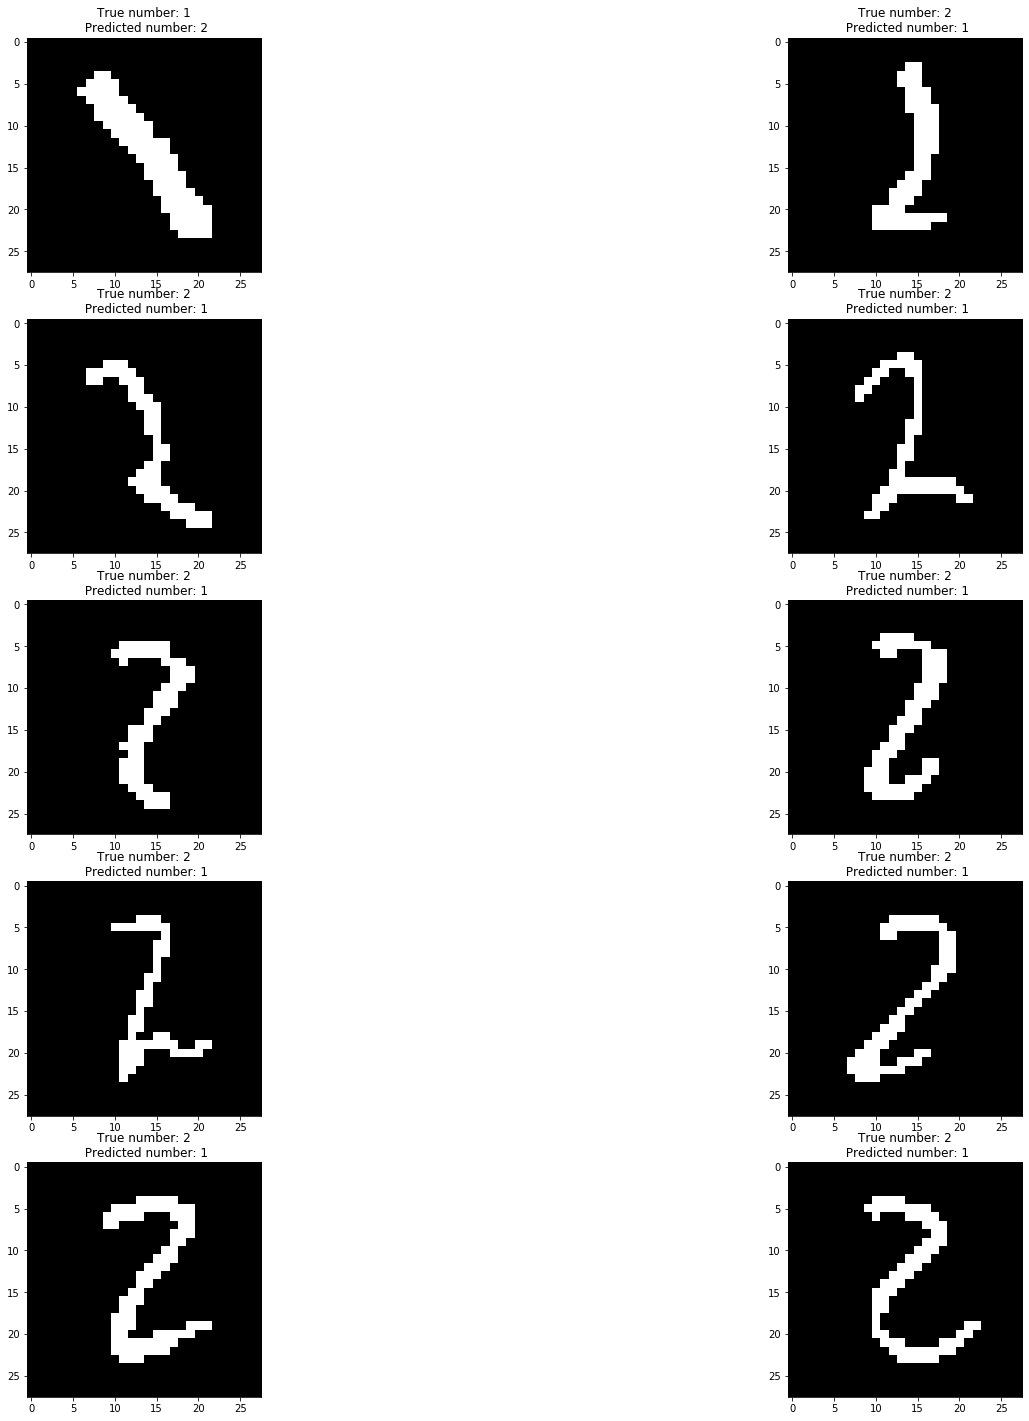

In [138]:
fig, ax = plt.subplots(5, 2, figsize=(25, 25))
for i in range(5*2):
    ax[i//2,i%2].imshow(X_wrong[i].reshape(28, 28), cmap='gray')
    ax[i//2,i%2].set_title('True number: ' + str(y_wrong[i].numpy())+'\n Predicted number: ' + str(pred_wrong[i].numpy()))